In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import adjusted_rand_score


from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam


#import torch

import warnings
warnings.simplefilter('ignore')


# For NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelEncoder

# For Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


from sklearn import decomposition


import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

#import torch

import warnings
warnings.simplefilter('ignore')


%matplotlib inline

%pylab inline

os.chdir('/Users/alexandrejacqueline/Data_Science/P6/data')

data = pd.read_csv('data_text.csv')

Populating the interactive namespace from numpy and matplotlib


# Data exploration 

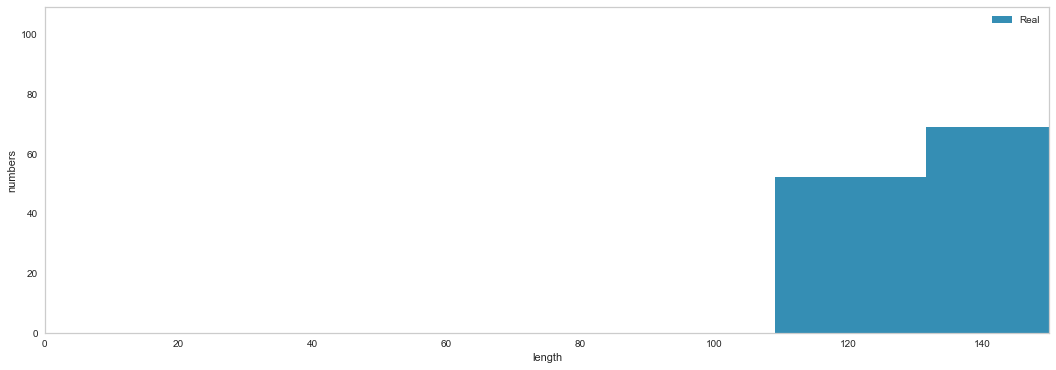

In [2]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

data['length'] = data['description'].apply(length)

plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(data['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

In [3]:
import nltk
import string
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexandrejacqueline/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexandrejacqueline/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/alexandrejacqueline/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alexandrejacqueline/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

In [5]:
def Preprocess_listofSentence(listofSentence):
    preprocess_list = []
    for sentence in listofSentence :
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

        words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())

        preprocess_list.append(sentence_clean)

    return preprocess_list 

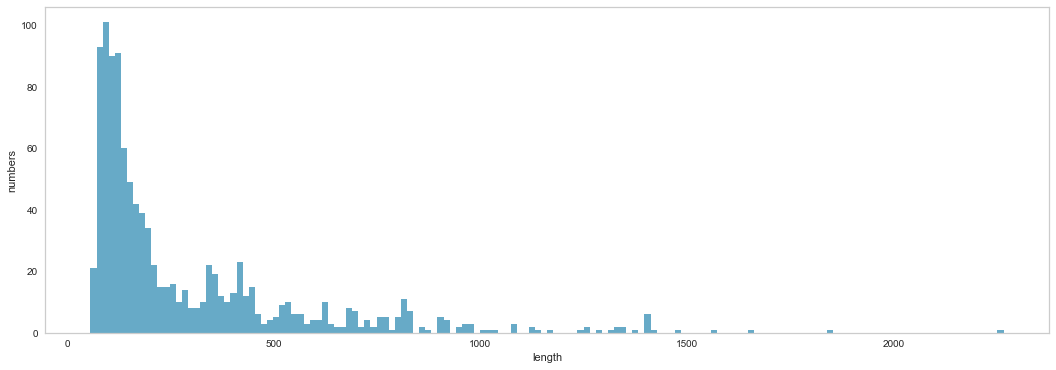

In [6]:
exex = Preprocess_listofSentence(data['description'])
data['des'] = exex

data['length']= data['des'].apply(length)

plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(data['length'], alpha = 0.6, bins=bins)
plt.xlabel('length')
plt.ylabel('numbers')
plt.grid()
plt.show()

<AxesSubplot:>

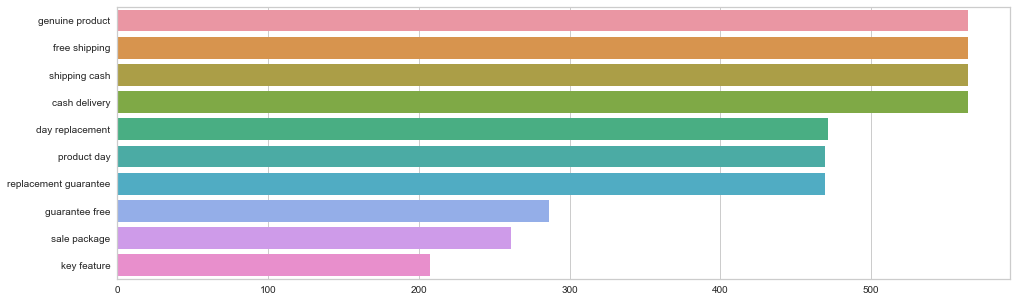

In [7]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_tweet_bigrams(data['des'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

# 1 - Wordcloud

In [8]:
adTrue  = data[data["is_FK_Advantage_product"]==True]
adFalse = data[data["is_FK_Advantage_product"]==False]
ad = data

In [9]:
corpus_new_true=adTrue.description
corpus_new_False=adFalse.description

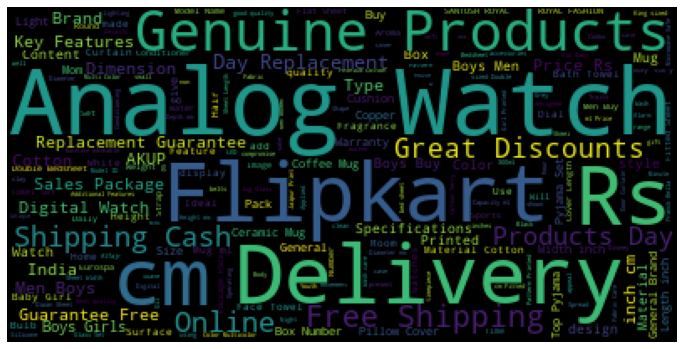

In [10]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new_False[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

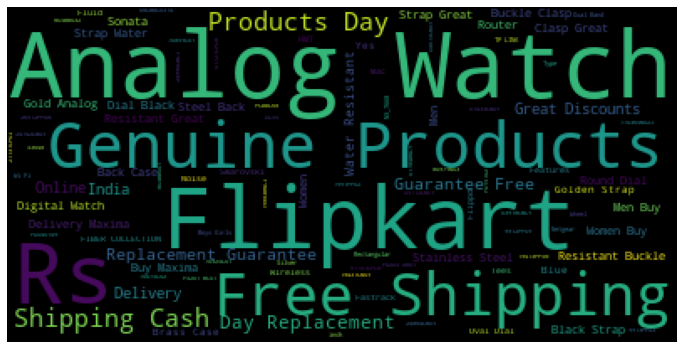

In [11]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new_true[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [14]:
ad = data
corpus_ad =ad.description

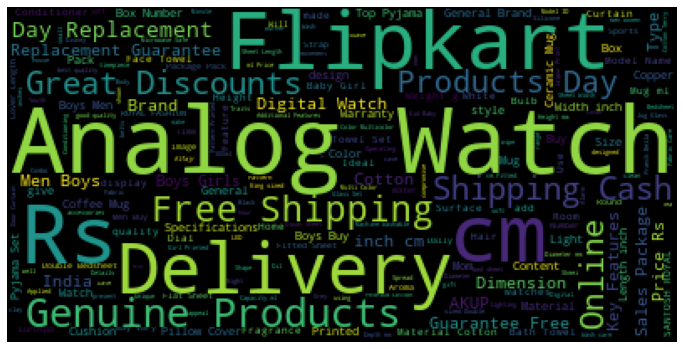

In [15]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_ad[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

# Extraction des catégories 

In [ ]:
#data.product_category_tree[0].split(">")[0].replace('["','')
lem = []

for i,rows in data.iterrows():
    
    lem.append(data.product_category_tree[i].split(">")[0].replace('["',''))
data['categ'] = lem

data['cate'] = data.product_category_tree.apply(lambda row: row.split(">")[0].replace('["',''))
ex =data['cate']

In [ ]:
import nltk
import string
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

exex = Preprocess_listofSentence(data['description'])
data['des'] = exex
data['length']= data['des'].apply(length)

# 2 - Latent Semantic Analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.patches as mpatches

In [ ]:
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = data["description"].tolist()
list_labels = data["is_FK_Advantage_product"].tolist() #"is_FK_Advantage_product"

X_train_counts, count_vectorizer = cv(list_corpus)
#X_test_counts = count_vectorizer.transform(list_corpus) #   X_test_counts    list_corpus

In [ ]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='False')
            blue_patch = mpatches.Patch(color='blue', label='True')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(11, 11))          
plot_LSA(X_train_counts, list_labels)
plt.show()

# 3 - TFIDF

In [ ]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(list_corpus)
#X_test_tfidf = tfidf_vectorizer.transform(X_test)


fig = plt.figure(figsize=(11, 11))          
plot_LSA(X_train_tfidf, list_labels)
plt.show()

In [ ]:
#1 extraire le premier element de la colonne product_category_tree utiliser split 
# Nettoyaged de la col tokenize + lower case + drop chiffre + drop stop word  >>>> description
# Apply tech de rationalisation lem ou stem créer deux col et comparer 
# Apply les tech d'extraction des features, à partir des données text comment avoir des vecteur manipulable bag of word, vect to vect, tif DIF, word to vect 
# Ensuite applu PCA + KMEAN 
#SCORE ARI entre les categ et cluster id 

#2 image 

# CountVectorizer

In [ ]:
vector = CountVectorizer()
X = vector.fit(data['des'])
X_transform = X.transform(data['des'])
#print(X_transform.shape)
#pd.DataFrame(X_transform.toarray(), columns=vector.get_feature_names()).head(5)

# Tfidf

In [ ]:
Tfidf = TfidfTransformer()
tfidf_transformer = Tfidf.fit(X_transform)
X = tfidf_transformer.transform(X_transform)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99) #prendre tt les composante avec 99 de variance
PCA = pca.fit(pd.DataFrame(X.toarray()))
X_pca = pca.transform(X.toarray())

kmeanModel = KMeans(n_clusters=7)
kmeanModel.fit(X_pca)
pred_labels = kmeanModel.labels_;
c = kmeanModel.cluster_centers_

In [ ]:
dfcl = pd.DataFrame(columns=['x','y','label'])
dfcl['x'] = X_pca[:,0]
dfcl['y'] = X_pca[:,1]
dfcl['label'] = kmeanModel.labels_
dfcl['cat'] = data['cate'].values
new_label = data['cate'].values

#plotting data
plt.figure(figsize=(11,11))
sns.scatterplot(dfcl['x'],dfcl['y'],hue=dfcl['cat'])
plt.title('CountVectorizer - PCA - Kmean')
plt.show()

# TSNE

In [ ]:
#https://www.kaggle.com/code/tilii7/dimensionality-reduction-pca-tsne
#https://www.kaggle.com/code/rony1612038/pca-tsne

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=20,n_iter=1000)
tsne_result = tsne.fit_transform(X_pca)

#creating a new dataframe including target
new_df_tsne = pd.DataFrame(np.hstack((tsne_result,np.array(new_label).reshape(-1,1))),
                           columns=['1st_component','2nd_component','Cat'])
#new_df_tsne.head()

#plotting data
plt.figure(figsize=(11,11))
sns.scatterplot(new_df_tsne['1st_component'],new_df_tsne['2nd_component'],hue=new_df_tsne['Cat'])
plt.title('Scatter-plot')
plt.show()

In [ ]:
print("ARI Score for Model: %.2f" % adjusted_rand_score(dfcl['cat'], dfcl['label']))

# Label encoder


In [ ]:
labelencoder = LabelEncoder()
data['cate_label_encoe'] = labelencoder.fit_transform(data['cate'])

print("ARI Score for Model: %.2f" % adjusted_rand_score(data['cate_label_encoe'], pred_labels))

In [ ]:
# faire ARI sur les différents algo
# Utiliser les feture de TSNE pour faire un ARI 
# BERT, word to vec et universal sentence encoder à faire
# Webinaire sure les images 

In [ ]:
#pip install -q tf-models-official

In [ ]:
import os
import shutil
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')

In [ ]:
df = data[["is_FK_Advantage_product","des"]].copy()

# Word2Vec

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = df['des'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

In [ ]:
#model_vectors.shape

# w2v_words 

In [ ]:
# Préparation des sentences (tokenization)
print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

In [ ]:
# Création du modèle
input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca_vect =pca.fit_transform(embeddings)

principalDf = pd.DataFrame(data = pca_vect[:,0:2]
             , columns = ['principal component 1', 'principal component 2'])

principalDf['target'] = data['cate'].values

plt.figure(figsize=(11,11))
sns.scatterplot(
    x="principal component 1", y="principal component 2", hue="target", data=principalDf, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.legend(prop={'size': 10}) 

plt.show()

In [ ]:
from sklearn.manifold import TSNE
embedded = TSNE(n_components=2, 
                learning_rate='auto',
                init='random', 
                perplexity=3).fit_transform(pca_vect)

principalDf = pd.DataFrame(data = embedded[:,0:2]
             , columns = ['principal component 1', 'principal component 2'])

principalDf['target'] = data['cate'].values

plt.figure(figsize=(11,11))
sns.scatterplot(
    x="principal component 1", y="principal component 2", hue="target", data=principalDf, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.legend(prop={'size': 10}) 

plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
data['cate_label_encoe'] = labelencoder.fit_transform(data['cate'])

In [ ]:
#PCA 
kmeans_1 = KMeans(n_clusters=7, random_state=0).fit(np.array(pca_vect))
print("ARI Score for Model: %.2f" % adjusted_rand_score(data['cate_label_encoe'], kmeans_1.labels_))

In [ ]:
#TSNE 
kmeans_2 = KMeans(n_clusters=7, random_state=0).fit(np.array(embeddings))
print("ARI Score for Model: %.2f" % adjusted_rand_score(data['cate_label_encoe'], kmeans_2.labels_))


## from sklearn import cluster, metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [ ]:
#tsne_plot(bigram_model)


# BERT 

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [ ]:
from transformers import TFAutoModel, AutoTokenizer

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['des'].to_list()

In [ ]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

In [ ]:
#features_bert
principalDf = pd.DataFrame(data = features_bert[:,0:2]
             , columns = ['principal component 1', 'principal component 2'])

#principalDf['target'] = data['cate']

# BERT PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca_vect_bert =pca.fit_transform(features_bert)

principalDf = pd.DataFrame(data = pca_vect_bert[:,0:2]
             , columns = ['principal component 1', 'principal component 2'])

principalDf['target'] = data['cate'].values


plt.figure(figsize=(11,11))
sns.scatterplot(
    x="principal component 1", y="principal component 2", hue="target", data=principalDf, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.legend(prop={'size': 10}) 

plt.show()

# BERT TSNE

In [ ]:
from sklearn.manifold import TSNE
tsne_bert = TSNE(n_components=2, 
                learning_rate='auto',
                init='random', 
                perplexity=3).fit_transform(features_bert)

principalDf_BERT = pd.DataFrame(data = tsne_bert[:,0:2]
             , columns = ['principal component 1', 'principal component 2'])


principalDf_BERT['target'] = data['cate'].values


plt.figure(figsize=(11,11))
sns.scatterplot(
    x="principal component 1", y="principal component 2", hue="target", data=principalDf_BERT, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.legend(prop={'size': 10}) 

plt.show()


In [ ]:
#PCA 
kmeans_3 = KMeans(n_clusters=7, random_state=0).fit(np.array(features_bert))
print("ARI Score for Model: %.2f" % adjusted_rand_score(data['cate_label_encoe'], kmeans_3.labels_))

# USE:

In [ ]:
#Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow_hub import KerasLayer
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
import tensorflow_text

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.load(module_url)
print ("module %s loaded" % module_url)
#https://stackoverflow.com/questions/62358745/oserror-savedmodel-file-does-not-exist-at-c-users-munib-new-folder-saved-mod

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
CLASSES = ['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers ']

In [ ]:
batch_size = 10
sentences = data['des'].to_list()

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

# USE PCA 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca_vect_use =pca.fit_transform(features_USE)

principalDf = pd.DataFrame(data = pca_vect_use[:,0:2]
             , columns = ['principal component 1', 'principal component 2'])

principalDf['target'] = data['cate'].values
plt.figure(figsize=(11,11))
sns.scatterplot(
    x="principal component 1", y="principal component 2", hue="target", data=principalDf, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.legend(prop={'size': 10}) 

plt.show()

# USE TSNE

In [ ]:
tsne_use = TSNE(n_components=2, 
                learning_rate='auto',
                init='random', 
                perplexity=3).fit_transform(features_USE)

principalDf_use = pd.DataFrame(data = tsne_use[:,0:2]
             , columns = ['principal component 1', 'principal component 2'])

principalDf_use['target'] = data['cate'].values
plt.figure(figsize=(11,11))
sns.scatterplot(
    x="principal component 1", y="principal component 2", hue="target", data=principalDf_use, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.legend(prop={'size': 10}) 

plt.show()

In [ ]:
kmeans_4 = KMeans(n_clusters=7, random_state=0).fit(np.array(features_USE))
print("ARI Score for Model: %.2f" % adjusted_rand_score(data['cate_label_encoe'], kmeans_4.labels_))

In [ ]:
#Corriger problème target 


# IMAGE 

In [ ]:
import cv2 as cv
from os import listdir

In [ ]:
os.chdir('/Users/alexandrejacqueline/Data_Science/P6/data/Images')

In [ ]:
path = '/Users/alexandrejacqueline/Data_Science/P6/data/Images/'
#list_photos = [file for file in listdir(path)]
#print(len(list_photos))
list_photos = [file for file in listdir(path)]
print(len(list_photos))

In [ ]:
list_img = data['image'].to_list()

# IMG

# ORB

In [ ]:
# On crée une liste de nos photos
path = '/Users/alexandrejacqueline/Data_Science/P6/data/Images/'
list_photos = [file for file in listdir(path)]
print(len(list_photos))


In [ ]:
# On réordonne
data.set_index('image', inplace=True)
#data = data.reindex(list_photos)
#data = data.reset_index()

In [ ]:
list_path = list(data.index)


In [ ]:
list_path

In [ ]:
import cv2
# Premier test en mettant l'image en noir et blanc
img = cv2.imread(path + '/' + list_photos[0], 0)
# On crée le modèle
orb = cv2.ORB_create()

# On trouve les keypoints avec ORB
kp = orb.detect(img, None)

# Et les descripteurs
kp, des = orb.compute(img, kp)

# On indique les keypoints sur l'image
img2 = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

plt.imshow(img2)
plt.show()

In [ ]:
# On va créer une liste qui va reprendre les descripteurs de chacune de nos images
list_descriptors=[]
orb = cv2.ORB_create(nfeatures=750)

# Même principe que précédemment mais pour toutes les images
for image in range(len(list_path)):
    im = cv2.imread(path + '/' + list_path[image], 0)
    kp = orb.detect(im, None)
    keypoints, descriptor = orb.compute(im, kp)
    list_descriptors.append(descriptor)

In [ ]:
img = cv2.imread(path + '/' + list_path[0], 0)
orb = cv2.ORB_create()
kp = orb.detect(img, None)
kp, des = orb.compute(img, kp)
img2 = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)
plt.imshow(img2)
plt.show()

In [ ]:
# On crée une array de descripteurs
array_descriptors = np.asarray(list_descriptors, dtype=object)

In [ ]:
index = [0,338,337,340]
list_descriptors = np.delete(list_descriptors, index)

In [ ]:
index = [339]
list_descriptors = np.delete(list_descriptors, index)

In [ ]:
# Et on concatène notre liste de descripteurs
list_descriptors_all = np.concatenate(list_descriptors, axis=0)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
k = int(round(np.sqrt(len(list_descriptors_all)), 0))
print("Nombre de clusters estimés : ", k)

# Clustering
kmeans = MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=24, batch_size=4096)
kmeans.fit(list_descriptors_all)

In [ ]:
def build_histogram(kmeans, des, image_num):
    """
    Prend un algorithme de clustering (kmeans), des descripteurs ainsi
    que l'index de l'image. L'objectif est de regrouper les descripteurs
    entre eux pour avoir des "visual bags of words". On compte le nombre
    de descripteur dans chaque cluster et pour chaque image. Retourne
    l'histogramme de l'image

            Parameters :
                kmeans : algorithme de clustering utilisé sur nos descripteurs
                des : les descripteurs à utiliser par image
                image_num : index de l'images
    """
    
    # Création de nos clusters et des histogrammes vides
    cluster = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    
    # Nombre de descripteurs
    nb_des=len(des)

    if nb_des==0: print('Problème histogramme image  : ', image_num)

    # On remplit nos histogrammes
    # On pondère par le nombre de descripteurs
    for i in cluster:
        hist[i] += 1.0/nb_des
        
    return hist

In [ ]:
# identification of key points and associated descriptors
orb_keypoints = []
temps1=time.time()
orb = cv.ORB_create(nfeatures=128)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv.equalizeHist(image)   # equalize image histogram
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints)
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")

In [ ]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.95)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

df_pca = pd.DataFrame(feat_pca[:,0:2], columns=['pca1', 'pca2'])
df_pca["class"] = data["cate"].values

plt.figure(figsize=(12,7))
sns.scatterplot(
    x="pca1", y="pca2", hue="class", data=df_pca, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.legend(prop={'size': 10}) 

plt.show()

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(im_features)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["cate"].values

plt.figure(figsize=(12,7))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.legend(prop={'size': 10}) 

plt.show()

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import cluster, metrics
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(im_features)
metrics.adjusted_rand_score(data['cate'], kmeans.labels_)

# resnet50 keras

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
model = ResNet50( include_top=False,
    weights='imagenet',
    pooling="avg"
)

In [ ]:
model.summary()

In [ ]:
# Premier test en mettant l'image en noir et blanc
img = cv2.imread(path + '/' + list_photos[0])
#plt.imshow(img)
#plt.show()img = 
img = cv2.resize(img,(224,224))
#img.shape
img = np.expand_dims(img,axis=0)
#img.shape
#vec_1 = model.predict(img)
#vec_1.shape
#np.array(vec_1) # à ajouter dans liste 

In [ ]:
features_cnn  = []

for image in range(len(list_path)):
    im = cv2.imread(path + '/' + list_path[image])
    im = cv2.resize(im,(224,224))
    im = np.expand_dims(im,axis=0)
    features_cnn.append(model.predict(im))

In [ ]:
feature_np = np.array(features_cnn)
feature_np = np.reshape(feature_np,(1050,2048))

In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", feature_np.shape)
pca = decomposition.PCA(n_components=0.95)
feat_pca= pca.fit_transform(feature_np)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

df_pca_cnn = pd.DataFrame(feat_pca[:,0:2], columns=['pca1', 'pca2'])
df_pca_cnn["class"] = data["categ"].values

plt.figure(figsize=(12,7))
sns.scatterplot(
    x="pca1", y="pca2", hue="class", data=df_pca_cnn, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.legend(prop={'size': 10}) 

plt.show()

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import cluster, metrics
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(feat_pca)
metrics.adjusted_rand_score(data['cate'], kmeans.labels_)

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne_cnn = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne_cnn["class"] = data["cate"].values

plt.figure(figsize=(12,7))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne_cnn, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.legend(prop={'size': 10}) 

plt.show()

# Ranking 

In [ ]:
cat_method = ["tf-idf", "Word2Vec", "Bert Hugging Face","USE"]
method_ari_score = ["0.2", "0.18", "0.19", "0.32"]
ranking = pd.DataFrame({"cat_method": cat_method, "method_ari_score": method_ari_score})
ranking['method_ari_score'] = pd.to_numeric(ranking['method_ari_score'])
ranking

In [ ]:
ranking.plot(x ='cat_method', y='method_ari_score', kind='bar')
plt.show()

In [ ]:
cat_method = ["ORB","CNN T-learning"]
method_ari_score = ["0.0005" ,"0.34"]
ranking = pd.DataFrame({"cat_method": cat_method, "method_ari_score": method_ari_score})
ranking['method_ari_score'] = pd.to_numeric(ranking['method_ari_score'])
ranking

In [ ]:
ranking.plot(x ='cat_method', y='method_ari_score', kind='bar')
plt.show()